In [1]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
#import Path
#import torch
#import torchvision
#import torchvision
#from torchvision import models as models


In [5]:
res = models.alexnet
#hyperparameters
batch_size = 10
epochs = 50
#lr = 0.01 #you can set a specific learning rate or just let it perform cyclic training

#Storing path
save_loc = 'alexnetmodel_trainedonSIPAKMEDdataset5000' + str(epochs) + "batch" + str(batch_size)

## Declaring path of dataset
path_img = Path("SIPakMed_format_unaugumented")

#Declaring the .pth path for the model weights
weights_path = path_img/'models'/"alexnetmodeltrainedon_DA_HERLEV_SIPAKMED95accuracy"/"alexnetmodel_trainedonExtendedDAdataset50batch100.001BEST"  #this needs to be of .pth extension

#Model path (.pkl) to the folder with the "export.pkl" seraialization file
model_path = path_img/'models'/"alexnetSimplesipakmedE10B5accuracy87"   #this needs to be of .pkl extension and it needs to have the name "export.pkl"
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train',
            valid='val', ds_tfms=get_transforms(), size = 224, bs=batch_size)#, check_ext=False)  #the size of the input pictures is quite important
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)
#data.show_batch(rows=3, figsize=(10,8))
print(data.classes)
len(data.classes),data.c

d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The de

['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']


d:\major_project\env_major_project\lib\site-packages\torch\nn\functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


(5, 5)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\Aditya Arora/.cache\torch\hub\checkpoints\alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.961414,1.040849,0.587629,0.581150,02:33
1,1.541183,0.663123,0.773196,0.771870,01:15
2,1.277145,0.608897,0.819588,0.819417,01:14
3,1.141808,0.499445,0.824742,0.824152,01:22
4,0.921952,0.421501,0.850515,0.849631,01:18
5,0.836331,0.407057,0.860825,0.859265,01:21
6,0.737635,0.463409,0.860825,0.860026,01:21
7,0.846471,0.662749,0.798969,0.795059,01:18
8,0.895116,0.701642,0.809278,0.808233,01:17
9,0.831393,0.567906,0.819588,0.818085,01:19


Better model found at epoch 0 with accuracy value: 0.5876288414001465.
Better model found at epoch 1 with accuracy value: 0.7731958627700806.
Better model found at epoch 2 with accuracy value: 0.8195876479148865.
Better model found at epoch 3 with accuracy value: 0.8247422575950623.
Better model found at epoch 4 with accuracy value: 0.8505154848098755.
Better model found at epoch 5 with accuracy value: 0.8608247637748718.
Better model found at epoch 28 with accuracy value: 0.8814433217048645.
Better model found at epoch 34 with accuracy value: 0.8969072103500366.
Better model found at epoch 35 with accuracy value: 0.907216489315033.
Better model found at epoch 37 with accuracy value: 0.9278350472450256.


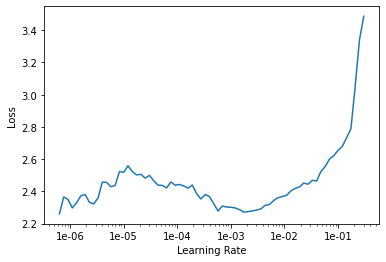

In [6]:

defaults.device = torch.device('cuda')


trans_model= cnn_learner(data, models.alexnet, metrics=[accuracy,FBeta(average="weighted")])

trans_model.unfreeze()

trans_model.lr_find()
trans_model.recorder.plot()
trans_model.fit_one_cycle(epochs,callbacks=[SaveModelCallback(trans_model, every='improvement', mode = 'max', monitor='accuracy', name=save_loc)])

trans_model.save(save_loc)
trans_model.export()